A3.1_588359

DIEGO MARCELO GONZALEZ LUJAN IMT 588359

1. Importa los datos a tu ambiente de trabajo y revisa que no haya huecos. Calcula la
diferencia de promedios entre las clases 2 y 4 para todos los genes, e imprime los 10
genes con la mayor diferencia de medias. Indica qué crees que esta diferencia podría
implicar en términos de un estudio de inferencia. (use chatgpt para saber como caluclar la diferencia absoluta de medias por gen)


Este codigo importa un archivo llamado Khan y verifica si hay datos que faltan en el archivo. Luego que ya se checo por datos que faltan filtra las observaciones correspondientes a las clases 2 y 4, eliminando la columna de clases 'y' para que solamente trabaje con los valores de expresion genetica. Al final calcula la diferencia absoluta de las medias de cada gene entre estas dos clases y por ultimo ordena las diferencias de mayor a menor y selecciona los 10 genes con mayor diferencia. 

In [1]:
import pandas as pd 
df = pd.read_csv('A3.1 Khan.csv')

huecos = df.isnull().sum().sum()
print(f"Huecos en el dataset: {huecos}")

#Filtrar las clases 2 y 4
clase_2 = df[df['y'] == 2].drop(columns='y')
clase_4 = df[df['y'] == 4].drop(columns='y')

#Calcular la diferencia absoluta de medias por gen
diferencias = (clase_2.mean() - clase_4.mean()).abs()

#Obtener los 10 genes con mayor diferencia
top_10_genes = diferencias.sort_values(ascending=False).head(10)

print("Top 10 genes con mayor diferencia de medias entre clases 2 y 4:")
print(top_10_genes)


Huecos en el dataset: 0
Top 10 genes con mayor diferencia de medias entre clases 2 y 4:
X187     3.323151
X509     2.906537
X2046    2.424515
X2050    2.401783
X129     2.165185
X1645    2.065460
X1319    2.045941
X1955    2.037340
X1003    2.011337
X246     1.837830
dtype: float64


2. Calcula el estadístico t y el p-value para comparar las medias de todos los genes entre la
clase 2 y la clase 4 de la base de datos. Usa la metodología de Bonferroni, de Holm, y de
Benjamini-Hochberg para corregir por múltiples pruebas e indica, para cada una, qué
genes tienen una expresión significativamente distinta entre las clases (maneja un control
de 0.05). Te recomiendo usar la función multipletests de statsmodels.stats.multitest 

Este codigo realiza pruebas estadisticas para comparar las medias de expresion genica entre las clases 2 y 4. Primero, use la libreria scipy para calcular el estadistico t y valores p en cada gene, Luego use la funcion multipletest de statsmodels para ajustar los valores p y controlar el error por comparaciones multiples:

*Boneferroni* este tipo de metodo es mas conservador ya que divide el nivel de significancias (0.05) entre el numero de pruebas, lo que reduce la probabilidad de falsos positivos, pero puede aumentar los falsos negativos.

*Holm* este tipo de metodo tambien controla el error tipo 1 osea falso positivo pero no conserva mucho a comparacion de Boneferroni lo que hace es ordenar los valores p y ajusta cada uno progresivamente.

*Benjamini-Hochberg* este metodo controla las tasas de falso descubirmientos, en otras palabras permite algunos falsos positivos pero controla la cantidad de valores que estan relacionados a los verdaderos positivos. Esto se me hace util ya que cuando se busca un balance entre sensibilidad y especificidad.


In [2]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

# Calcular estadístico t y p-values
t_stat, p_values = ttest_ind(clase_2, clase_4, axis=0, equal_var=False)

# Bonferroni
rej_bonf, pval_bonf, _, _ = multipletests(p_values, alpha=0.05, method='bonferroni')
# Holm
rej_holm, pval_holm, _, _ = multipletests(p_values, alpha=0.05, method='holm')
# Benjamini-Hochberg 
rej_bh, pval_bh, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

genes = clase_2.columns

# Genes significativos con cada método
significativos_bonf = genes[rej_bonf]
significativos_holm = genes[rej_holm]
significativos_bh = genes[rej_bh]

print("Genes significativos (Bonferroni):")
print(significativos_bonf.tolist())

print("\nGenes significativos (Holm):")
print(significativos_holm.tolist())

print("\nGenes significativos (Benjamini-Hochberg):")
print(significativos_bh.tolist())

Genes significativos (Bonferroni):
['X2', 'X36', 'X67', 'X129', 'X174', 'X187', 'X188', 'X229', 'X246', 'X251', 'X338', 'X348', 'X368', 'X372', 'X373', 'X380', 'X430', 'X433', 'X509', 'X545', 'X554', 'X558', 'X566', 'X603', 'X655', 'X714', 'X762', 'X910', 'X951', 'X971', 'X1003', 'X1021', 'X1023', 'X1055', 'X1070', 'X1093', 'X1105', 'X1110', 'X1112', 'X1132', 'X1194', 'X1196', 'X1207', 'X1217', 'X1298', 'X1319', 'X1327', 'X1330', 'X1372', 'X1389', 'X1416', 'X1610', 'X1626', 'X1634', 'X1645', 'X1706', 'X1708', 'X1723', 'X1738', 'X1799', 'X1888', 'X1896', 'X1911', 'X1924', 'X1954', 'X1955', 'X1980', 'X2046', 'X2050', 'X2115', 'X2146', 'X2247']

Genes significativos (Holm):
['X2', 'X36', 'X67', 'X129', 'X174', 'X187', 'X188', 'X229', 'X246', 'X251', 'X338', 'X348', 'X368', 'X372', 'X373', 'X380', 'X430', 'X433', 'X509', 'X545', 'X554', 'X558', 'X566', 'X603', 'X655', 'X714', 'X762', 'X910', 'X951', 'X971', 'X1003', 'X1021', 'X1023', 'X1055', 'X1070', 'X1093', 'X1105', 'X1110', 'X1112', 'X

3. Realiza un experimento similar, pero ahora comparando las medias de las 4 clases de la
base de datos. Para lograrlo, en vez de trabajar con el estadístico t, te recomiendo realizar
pruebas de análisis de varianza (ANOVA). Dicha prueba la puedes realizar con la función
f_oneway de scipy.stats, pero revisa bien cómo se deben ingresar los datos a dicha
función, necesitarás primero estratificarlos por clase


Este codigo es similar al pasado pero en lugar de usar el estadistico t para comparar solo dos clases, ahora utilice el ANOVA para comparar las medias de expresion genica entre las cuatro clases del conjunto de datos. ANOVA permite detectar si al menos una clase difiere de las demas en la expresion de cada gen.

In [3]:
from scipy.stats import f_oneway
from statsmodels.stats.multitest import multipletests


clase_1 = df[df['y'] == 1].drop(columns='y')
clase_2 = df[df['y'] == 2].drop(columns='y')
clase_3 = df[df['y'] == 3].drop(columns='y')
clase_4 = df[df['y'] == 4].drop(columns='y')

#ANOVA por cada gen
p_values_anova = []
for gen in clase_1.columns:
    f_stat, p_val = f_oneway(clase_1[gen], clase_2[gen], clase_3[gen], clase_4[gen])
    p_values_anova.append(p_val)

# Bonferroni
rej_bonf, pval_bonf, _, _ = multipletests(p_values, alpha=0.05, method='bonferroni')
# Holm
rej_holm, pval_holm, _, _ = multipletests(p_values, alpha=0.05, method='holm')
# Benjamini-Hochberg 
rej_bh, pval_bh, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

genes = clase_1.columns

# Genes significativos con cada metodo
significativos_bh = genes[rej_bh]
significativos_bonf = genes[rej_bonf]
significativos_holm = genes[rej_holm]

print("Genes con diferencias significativas entre las 4 clases (ANOVA):\n")

print("Benjamini-Hochberg:")
print(significativos_bh.tolist())

print("\nBonferroni:")
print(significativos_bonf.tolist())

print("\nHolm:")
print(significativos_holm.tolist())

Genes con diferencias significativas entre las 4 clases (ANOVA):

Benjamini-Hochberg:
['X2', 'X3', 'X29', 'X36', 'X52', 'X67', 'X80', 'X89', 'X119', 'X129', 'X131', 'X139', 'X141', 'X146', 'X151', 'X153', 'X165', 'X166', 'X169', 'X174', 'X187', 'X188', 'X191', 'X214', 'X217', 'X229', 'X230', 'X244', 'X246', 'X251', 'X256', 'X258', 'X315', 'X323', 'X335', 'X336', 'X338', 'X340', 'X348', 'X365', 'X368', 'X372', 'X373', 'X378', 'X380', 'X384', 'X388', 'X390', 'X407', 'X409', 'X419', 'X426', 'X430', 'X433', 'X437', 'X443', 'X465', 'X469', 'X481', 'X482', 'X483', 'X500', 'X501', 'X503', 'X509', 'X518', 'X533', 'X534', 'X542', 'X545', 'X554', 'X558', 'X566', 'X598', 'X603', 'X604', 'X607', 'X636', 'X642', 'X650', 'X655', 'X696', 'X702', 'X714', 'X715', 'X733', 'X744', 'X746', 'X747', 'X753', 'X758', 'X760', 'X761', 'X762', 'X774', 'X779', 'X789', 'X795', 'X803', 'X808', 'X820', 'X828', 'X832', 'X851', 'X857', 'X867', 'X883', 'X891', 'X910', 'X941', 'X951', 'X964', 'X971', 'X973', 'X979', 'X9

4. Separa los datos en entrenamiento y prueba, construye y entrena un modelo de SVM con
un kernel lineal, con un kernel polinomial de orden 3, y con un kernel radial (puedes usar
los parámetros que gustes, no necesitas optimizar con validación cruzada). Para evitar
que el tiempo de procesamiento sea exagerado, puedes seleccionar solamente algunas
variables, partiendo de los resultados que obtuviste en los puntos anteriores. Esta no es
una práctica adecuada, pues estamos cayendo en una situación de fuga de datos. Lo
ideal sería que la selección de características se basara solamente en experimentos
realizados con los datos de entrenamiento. Pero, en este caso, obviaremos este detalle.


Este codigo entrene y evalua tres modelos de Maquinas de vectores de soporte usandi distintos kernels para clasificar muestras segun la expresion de 10 genes seleccionados previamente. Primero, los datos se dividen en entrenamiento y prueba de forma estratificada y luego se entrenan los tres modelos:

Kernel lineal, esto busca una separacion lineal entre las clases. 

Kernel polinomial de grado 3, que permite fronteras de decision curvas.

Kernel radial, que modela relaciones mas complejas y no lineales. 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

genes= ['X187', 'X509', 'X2046', 'X2050', 'X129', 'X1645', 'X1319', 'X1955', 'X1003', 'X246']

X = df[genes]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#SVM con kernel lineal
svm_lineal = SVC(kernel='linear')
svm_lineal.fit(X_train, y_train)
pred_lineal = svm_lineal.predict(X_test)
print("SVM con kernel lineal:")
print(classification_report(y_test, pred_lineal))

#SVM con kernel polinomial (grado 3)
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)
pred_poly = svm_poly.predict(X_test)
print("SVM con kernel polinomial (grado 3):")
print(classification_report(y_test, pred_poly))

#SVM con kernel radial (RBF)
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
pred_rbf = svm_rbf.predict(X_test)
print("SVM con kernel radial (RBF):")
print(classification_report(y_test, pred_rbf))

SVM con kernel lineal:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         8

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

SVM con kernel polinomial (grado 3):
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         9
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         8

    accuracy                           0.96        25
   macro avg       0.96      0.92      0.93        25
weighted avg       0.97      0.96      0.96        25

SVM con kernel radial (RBF):
              precision    recall  f1-sco

5. Calcula, para los 3 modelos, las métricas que consideres importantes para comparar los
desempeños. Indica qué opinas sobre los resultados, especificando si crees que uno de
los kernels es mejor para esta tarea específica. (le pedi a chatgpt que me ayudara en hacer la grafica y en correguir error de codigos que tenia) 

Matplotlib is building the font cache; this may take a moment.



SVM con kernel lineal:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



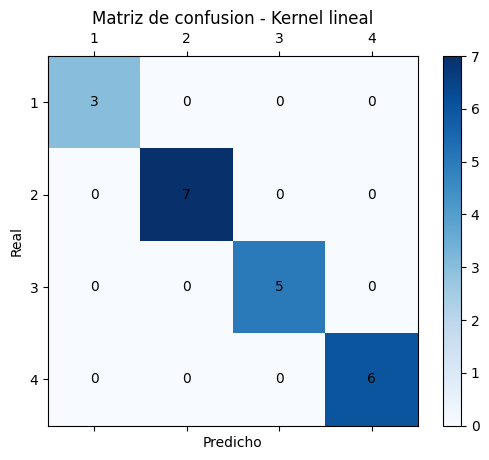


SVM con kernel polinomial:
Accuracy: 0.9523809523809523
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         7
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         6

    accuracy                           0.95        21
   macro avg       0.96      0.92      0.93        21
weighted avg       0.96      0.95      0.95        21



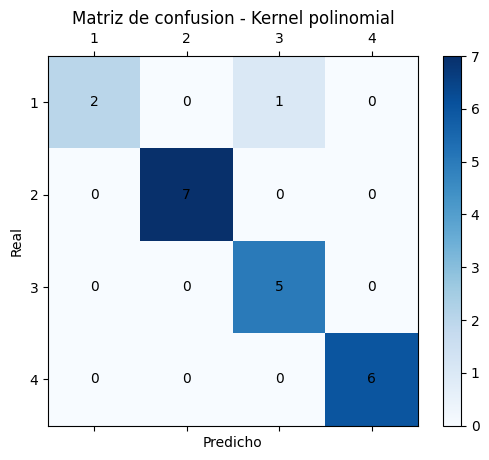


SVM con kernel rbf:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



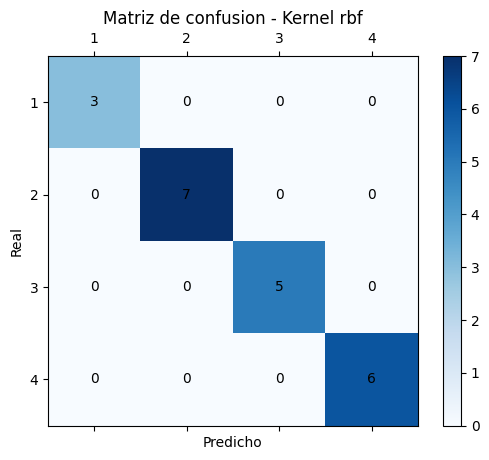

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('A3.1 Khan.csv')
X = df[['X187', 'X509', 'X2046', 'X2050', 'X129', 'X1645', 'X1319', 'X1955', 'X1003', 'X246']]
y = df['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Modelos SVM
modelos = {
    'lineal': SVC(kernel='linear'),
    'polinomial': SVC(kernel='poly', degree=3),
    'rbf': SVC(kernel='rbf')
}

# Entrenamiento y evaluacion
for nombre, modelo in modelos.items():
    print(f"\nSVM con kernel {nombre}:")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    
    cm = confusion_matrix(y_test, y_pred)
    clases = sorted(y.unique())

    
    fig, ax = plt.subplots()
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    plt.title(f'Matriz de confusion - Kernel {nombre}')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(clases)))
    ax.set_yticks(np.arange(len(clases)))
    ax.set_xticklabels(clases)
    ax.set_yticklabels(clases)
    plt.xlabel('Predicho')
    plt.ylabel('Real')

    
    for i in range(len(clases)):
        for j in range(len(clases)):
            ax.text(j, i, cm[i, j], va='center', ha='center', color='black')
    
    plt.show()
